In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data=pd.read_csv('bankIrregularities.csv',sep=',')
data.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [9]:
isFraudCount=data['fraud'].value_counts()[0]/len(data['fraud'])*100
notFraudCount=data['fraud'].value_counts()[1]/len(data['fraud'])*100
print("No Frauds Percentage:",isFraudCount)
print("Frauds Percentage:",notFraudCount)

#again imbalanced

No Frauds Percentage: 98.7891894800746
Frauds Percentage: 1.2108105199254007


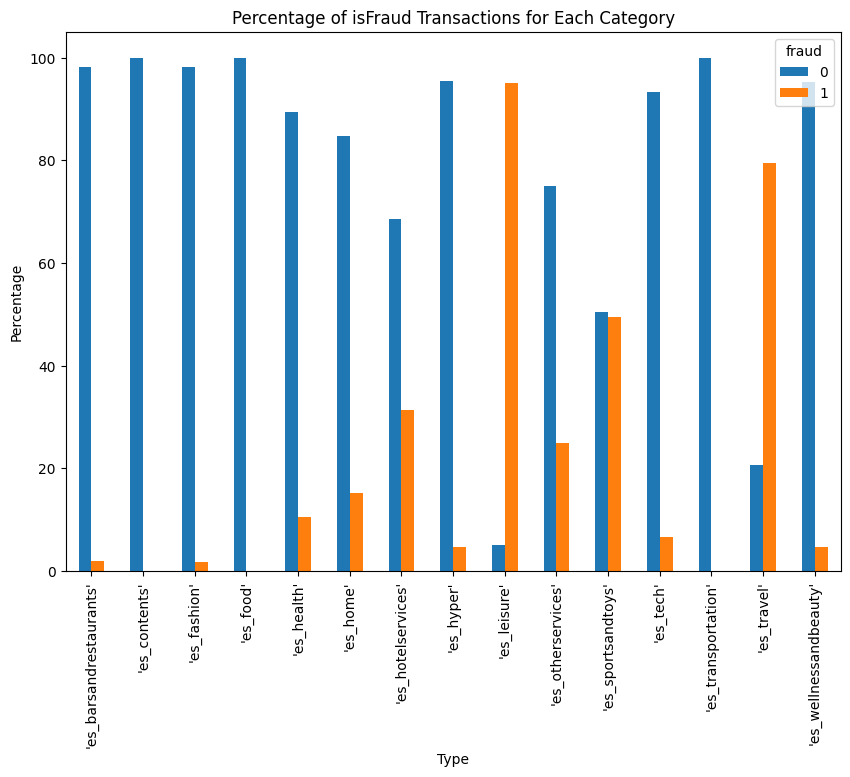

In [10]:
total_counts = data['category'].value_counts()

# Calculate the percentage of 'isFraud' for each 'type'
fraud_percentage = (data.groupby(['category', 'fraud']).size() / total_counts) * 100
fraud_percentage = fraud_percentage.unstack().fillna(0)

# Plot the percentage for each type
fraud_percentage.plot(kind='bar', stacked=False, figsize=(10, 7))

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Percentage of isFraud Transactions for Each Category')

plt.show()


In [11]:
# Create two dataframes with fraud and non-fraud data 
pd.concat([data.groupby('category')['amount'].mean(),data.groupby('category')['amount'].mean(),\
           data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","FraudPercent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])
#therefore highest Fraud transaction saw in leisure and travel giving those importance

,Fraudulent,Non-Fraudulent,FraudPercent(%)
category,,,
'es_transportation',26.958187,26.958187,0.000000
'es_food',37.070405,37.070405,0.000000
'es_barsandrestaurants',43.461014,43.461014,1.882944
'es_contents',44.547571,44.547571,0.000000
'es_hyper',45.970421,45.970421,4.591669
'es_wellnessandbeauty',65.511221,65.511221,4.759380
'es_fashion',65.666642,65.666642,1.797335
'es_tech',120.947937,120.947937,6.666667
'es_health',135.621367,135.621367,10.512614


In [12]:
#histo

In [13]:
#remvoing non-affecting columns
print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = data.drop(['zipcodeOri','zipMerchant'],axis=1)
data_reduced.columns

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

In [14]:
data_reduced.loc[:,['customer','merchant','category']].astype('category')
data_dum = pd.get_dummies(data_reduced.loc[:,['customer','merchant','category','gender']],drop_first=True)
print(data_dum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Columns: 4177 entries, customer_'C100045114' to gender_'U'
dtypes: bool(4177)
memory usage: 2.3 GB
None


In [15]:
# turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [16]:
#target varialble fraud in 1 dataframe
#other columns in 2nd datafraome
X = data_reduced.drop(['fraud'],axis=1)
y = data['fraud']
print(X.head(),"\n")
print(y.head())
y[y==1].count()
#highly imbalanced data

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


7200

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)
print(y_res.iloc[:,0].value_counts())
from sklearn.metrics import roc_curve, auc
def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

fraud
0    587443
1    587443
Name: count, dtype: int64
